## Library imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from chromatography import *
from torch import optim, tensor
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Dataset Import

In [13]:
alist = pd.read_csv('../data/Peter32.csv')

## Useful functions definition

In [4]:
def step_decay(lr, iteration, num_episodes, steps=10, decay_factor=1.5):
    if iteration % (num_episodes // steps) == 0:
        print(iteration)
        return lr / decay_factor
    
    return lr

Loss: 0.478639430347534, epoch: 100/2000
Loss: 0.17666661043673176, epoch: 200/2000
Loss: 0.1554724180314323, epoch: 300/2000
400
Loss: 0.1490038015181912, epoch: 400/2000
Loss: 0.14567732488992463, epoch: 500/2000
Loss: 0.14516728518035518, epoch: 600/2000
Loss: 0.14448860292920918, epoch: 700/2000
800
Loss: 0.14804913853539944, epoch: 800/2000
Loss: 0.14268283335812723, epoch: 900/2000
Loss: 0.1443176824843608, epoch: 1000/2000
Loss: 0.14254588957010272, epoch: 1100/2000
1200
Loss: 0.1429262922508455, epoch: 1200/2000
Loss: 0.14224372171817304, epoch: 1300/2000
Loss: 0.14189618239113386, epoch: 1400/2000
Loss: 0.1422629976236963, epoch: 1500/2000
1600
Loss: 0.14119418776572926, epoch: 1600/2000
Loss: 0.14040785264137381, epoch: 1700/2000
Loss: 0.14074268678602792, epoch: 1800/2000
Loss: 0.14029593245424124, epoch: 1900/2000
2000
Loss: 0.14007002883243153, epoch: 2000/2000


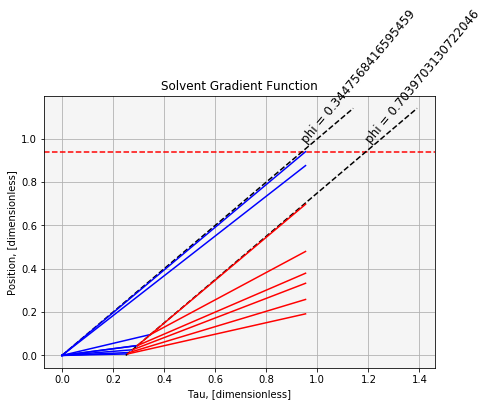

In [5]:
exp = ExperimentAnalytes(k0 = alist.k0.values, S = alist.S.values, h=0.001, grad='iso', run_time=None)
pol = Policy(2)
losses, best_program = reinforce(
        exp, 
        pol, 
        [.25, 33.25], 
        num_episodes=2000, 
        batch_size=10,
        optim=torch.optim.SGD,
        lr=1., 
        print_every=100,
        lr_decay=lambda a, b, c: step_decay(a, b, c, steps=5, decay_factor=1.8),
        baseline=0.17
    )
exp.print_analytes(rc=(7, 5))

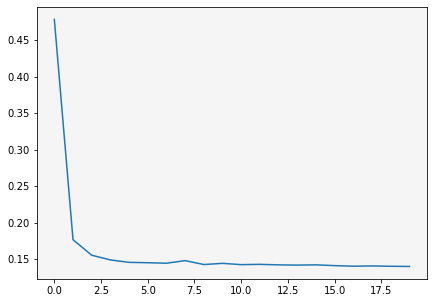

In [6]:
plt.plot(losses)

0.1370893263985015

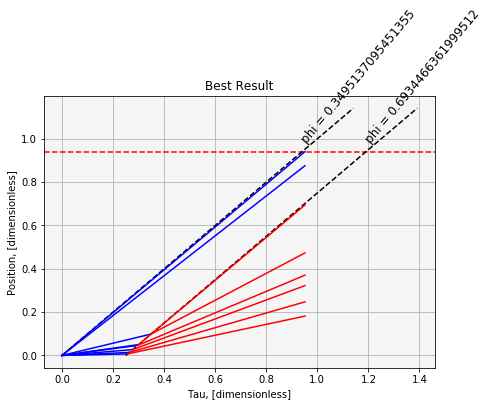

In [7]:
exp.reset()
exp.run_all(best_program.numpy(), [.25, 33.25])
exp.print_analytes(rc=(7, 5), title="Best Result")
exp.loss()

In [17]:
exp = ExperimentAnalytes(k0 = alist.k0.values, S = alist.S.values, h=0.001, grad='iso', run_time=None)
phis = np.linspace(0, 1, 1000)
loss = 2
phi_ = (1, 1)
loss_field = np.zeros((1000, 1000))
j = 0
for phi1 in phis:
    i = 0
    for phi2 in phis:
        exp.reset()
        exp.run_all([phi1, phi2], [0.25, 3000000])
        if exp.loss() < loss:
            loss = exp.loss()
            phi_ = (phi1, phi2)
        loss_field[i, j] = exp.loss()
        i += 1
    j += 1
print(phi_, loss)       
#(0.34934934934934936, 0.6936936936936937) 0.13708910598198898

(0.3743743743743744, 0.1991991991991992) 0.471499178379772


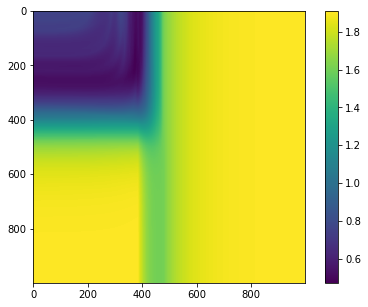

In [18]:
plt.imshow(loss_field[0:, 0:])
plt.colorbar()

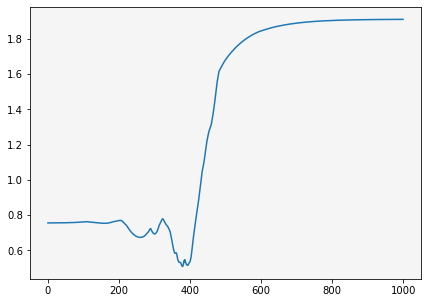

In [27]:
my_loss = []
phis = np.linspace(0, 1, 1000)

for phi in phis:
    exp.reset()
    exp.run_all([phi, 0.0], [0.25, 3000000])
    my_loss.append(exp.loss())

plt.plot(my_loss)     

Loss: 0.7827356822652994, epoch: 200/5000
Loss: 0.5965953411307979, epoch: 400/5000
Loss: 0.3952319823537095, epoch: 600/5000
Loss: 0.3293620867191834, epoch: 800/5000
1000
Loss: 0.30817642438115395, epoch: 1000/5000
Loss: 0.29935744912429846, epoch: 1200/5000
Loss: 0.2869729012054863, epoch: 1400/5000
Loss: 0.27824291473578544, epoch: 1600/5000
Loss: 0.25759987154192604, epoch: 1800/5000
2000
Loss: 0.23569589097499175, epoch: 2000/5000
Loss: 0.20387753413937523, epoch: 2200/5000
Loss: 0.1696107525257825, epoch: 2400/5000
Loss: 0.15792908632763186, epoch: 2600/5000
Loss: 0.14974124965865035, epoch: 2800/5000
3000
Loss: 0.146409625163751, epoch: 3000/5000
Loss: 0.14457045218940748, epoch: 3200/5000
Loss: 0.14253294180222828, epoch: 3400/5000
Loss: 0.1417453204001226, epoch: 3600/5000
Loss: 0.14037482462520268, epoch: 3800/5000
4000
Loss: 0.13990208211786653, epoch: 4000/5000
Loss: 0.13955483903993113, epoch: 4200/5000
Loss: 0.1388182154963567, epoch: 4400/5000
Loss: 0.13838128536804398,

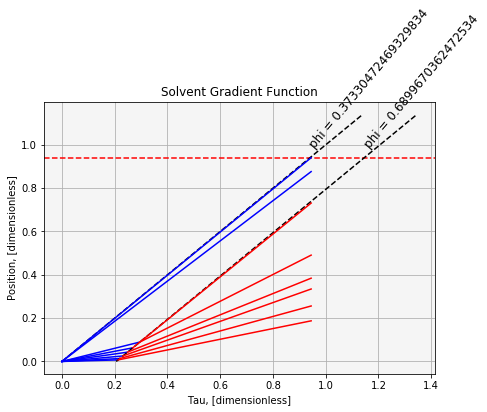

In [11]:
exp = ExperimentAnalytes(k0 = alist.k0.values, S = alist.S.values, h=0.001, grad='iso', run_time=None)
pol = PolicyTime(2)
losses, best_program, n_par, mus, sigmas, delta_taus = reinforce_delta_tau(
        exp, 
        pol,
        num_episodes=5000, 
        batch_size=10,
        optim=torch.optim.SGD,
        lr=.2, 
        print_every=200,
        lr_decay=lambda a, b, c: step_decay(a, b, c, steps=5, decay_factor=1.05),
        baseline=0.15,
    )
exp.print_analytes(rc=(7, 5))

0.1312863616903487

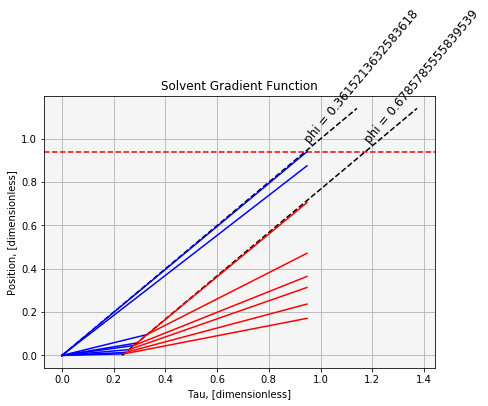

In [12]:
exp.reset()
exp.run_all(best_program[0], best_program[1])
exp.print_analytes(rc=(7, 5))
exp.loss()

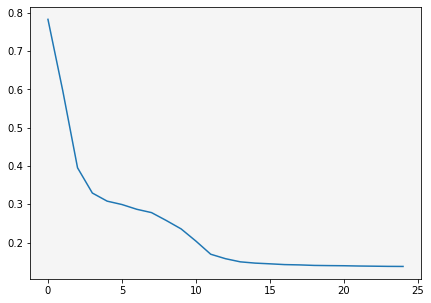

In [13]:
plt.plot(losses)

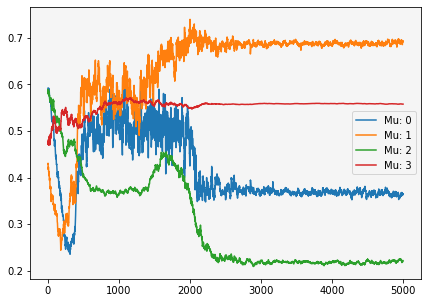

In [18]:
plt.plot(mus[:, 0], label='Mu: 0')
plt.plot(mus[:, 1], label='Mu: 1')
plt.plot(mus[:, 2], label='Mu: 2')
plt.plot(mus[:, 3], label='Mu: 3')
plt.legend()
plt.show()

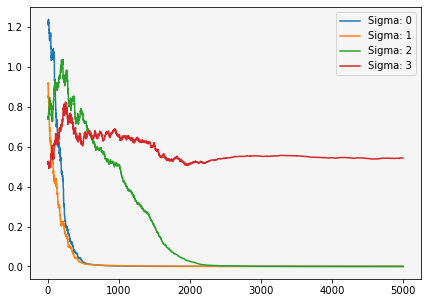

In [15]:
plt.plot(sigmas[:, 0], label='Sigma: 0')
plt.plot(sigmas[:, 1], label='Sigma: 1')
plt.plot(sigmas[:, 2], label='Sigma: 2')
plt.plot(sigmas[:, 3], label='Sigma: 3')
plt.legend()
plt.show()

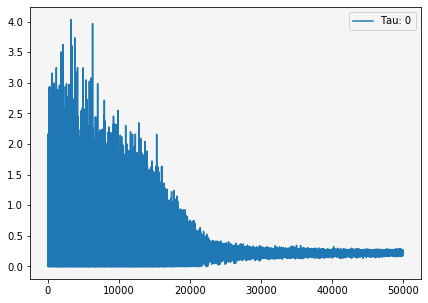

In [16]:
plt.plot(delta_taus[:, 0], label='Tau: 0')
#plt.plot(delta_taus[: ,1], label='Tau: 1')
plt.legend()
plt.show()